In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [48]:
df = pd.read_csv('/Users/Aziz/Desktop/Machine-Learning-Final-Project/y_test_predicted.csv')
df.head()

,Unnamed: 0,Y-test,Predicted
0,0,6.626488e+06,1.510474e+07
1,1,1.127006e+07,1.318067e+07
2,2,7.054003e+06,1.336109e+07
3,3,4.317905e+06,1.092222e+07
4,4,5.006145e+06,8.661106e+06


In [53]:
predicted_df = df.drop(columns=['Unnamed: 0','Y-test'])
predicted_df.head()

,Predicted
0,1.510474e+07
1,1.318067e+07
2,1.336109e+07
3,1.092222e+07
4,8.661106e+06


In [54]:
dataset = pd.read_csv('/Users/Aziz/Desktop/Machine-Learning-Final-Project/resources/nyc-rolling-sales.csv')
dataset.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [55]:
# removing unnecessary columns 
dataset.drop(['Unnamed: 0','ADDRESS','EASE-MENT','APARTMENT NUMBER','SALE DATE','NEIGHBORHOOD','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE'],inplace=True, axis=1)
dataset.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633,6440,1900,2,6625000
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616,18690,1900,2,-
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212,7803,1900,2,-
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272,6794,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369,4615,1900,2,8000000


In [56]:
# dropping the duplicate values from the dataset
dataset.drop_duplicates(keep=False, inplace = True)
dataset.duplicated(keep=False).sum()

0

In [57]:
# convert the varaible to different types
dataset['BUILDING CLASS CATEGORY'] = dataset['BUILDING CLASS CATEGORY'].astype('category')
dataset['TAX CLASS AT PRESENT'] = dataset['TAX CLASS AT PRESENT'].astype('category')
dataset['LAND SQUARE FEET'] = pd.to_numeric(dataset['LAND SQUARE FEET'], errors='coerce')
dataset['GROSS SQUARE FEET'] = pd.to_numeric(dataset['GROSS SQUARE FEET'], errors='coerce')
dataset['SALE PRICE'] = pd.to_numeric(dataset['SALE PRICE'], errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79420 entries, 0 to 84547
Data columns (total 14 columns):
BOROUGH                      79420 non-null int64
BUILDING CLASS CATEGORY      79420 non-null category
TAX CLASS AT PRESENT         79420 non-null category
BLOCK                        79420 non-null int64
LOT                          79420 non-null int64
ZIP CODE                     79420 non-null int64
RESIDENTIAL UNITS            79420 non-null int64
COMMERCIAL UNITS             79420 non-null int64
TOTAL UNITS                  79420 non-null int64
LAND SQUARE FEET             55397 non-null float64
GROSS SQUARE FEET            54165 non-null float64
YEAR BUILT                   79420 non-null int64
TAX CLASS AT TIME OF SALE    79420 non-null int64
SALE PRICE                   67068 non-null float64
dtypes: category(2), float64(3), int64(9)
memory usage: 8.0 MB


In [58]:
# replace null value with the mean values
dataset['LAND SQUARE FEET'] = dataset['LAND SQUARE FEET'].fillna(dataset['LAND SQUARE FEET'].mean())
dataset['GROSS SQUARE FEET'] = dataset['GROSS SQUARE FEET'].fillna(dataset['LAND SQUARE FEET'].mean())
dataset['SALE PRICE'] = dataset['SALE PRICE'].fillna(dataset['SALE PRICE'].mean())
dataset

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.000000,6440.000000,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.000000,18690.000000,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.000000,7803.000000,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.000000,6794.000000,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.000000,4615.000000,1900,2,8.000000e+06
5,1,07 RENTALS - WALKUP APARTMENTS,2,405,16,10009,20,0,20,2581.000000,9730.000000,1900,2,1.318088e+06
6,1,07 RENTALS - WALKUP APARTMENTS,2B,406,32,10009,8,0,8,1750.000000,4226.000000,1920,2,3.192840e+06
7,1,07 RENTALS - WALKUP APARTMENTS,2,407,18,10009,44,2,46,5163.000000,21007.000000,1900,2,1.318088e+06
8,1,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,10009,15,0,15,1534.000000,9198.000000,1920,2,1.318088e+06
9,1,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,10009,24,0,24,4489.000000,18523.000000,1920,2,1.623200e+07


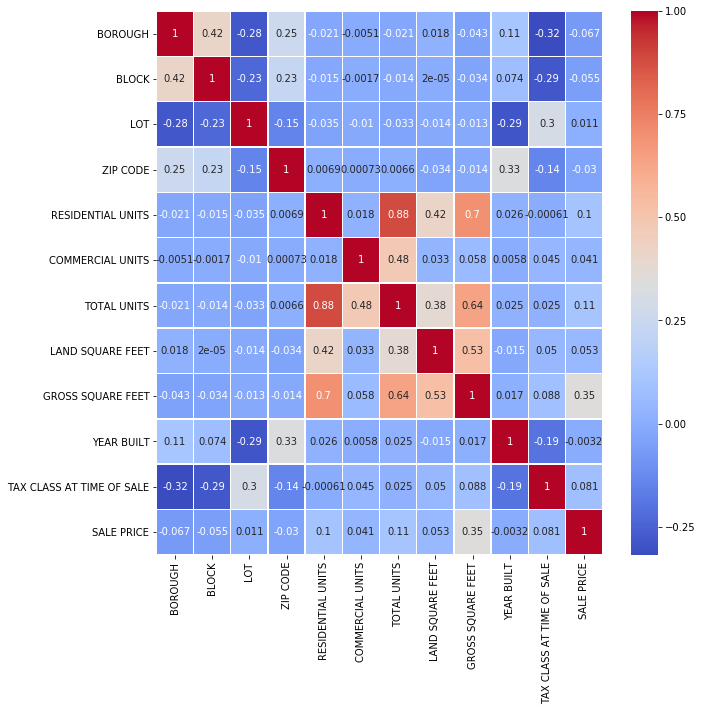

In [59]:
# Create correlation matrix to find the closest coefficients and x variables of interest
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="coolwarm", annot=True, linewidths=.5, ax = ax)

In [60]:
new_df = dataset[:23826]
new_df


,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.000000,6440.000000,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.000000,18690.000000,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.000000,7803.000000,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.000000,6794.000000,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.000000,4615.000000,1900,2,8.000000e+06
5,1,07 RENTALS - WALKUP APARTMENTS,2,405,16,10009,20,0,20,2581.000000,9730.000000,1900,2,1.318088e+06
6,1,07 RENTALS - WALKUP APARTMENTS,2B,406,32,10009,8,0,8,1750.000000,4226.000000,1920,2,3.192840e+06
7,1,07 RENTALS - WALKUP APARTMENTS,2,407,18,10009,44,2,46,5163.000000,21007.000000,1900,2,1.318088e+06
8,1,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,10009,15,0,15,1534.000000,9198.000000,1920,2,1.318088e+06
9,1,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,10009,24,0,24,4489.000000,18523.000000,1920,2,1.623200e+07


In [63]:
new_df['PREDICTED PRICE'] = predicted_df
new_df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,PREDICTED PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.0,6440.0,1900,2,6.625000e+06,1.510474e+07
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.0,18690.0,1900,2,1.318088e+06,1.318067e+07
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.0,7803.0,1900,2,1.318088e+06,1.336109e+07
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.0,6794.0,1913,2,3.936272e+06,1.092222e+07
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.0,4615.0,1900,2,8.000000e+06,8.661106e+06


In [65]:
new_df['BOROUGH'][new_df['BOROUGH'] == 1] = 'Manhattan'
new_df['BOROUGH'][new_df['BOROUGH'] == 2] = 'Bronx'
new_df['BOROUGH'][new_df['BOROUGH'] == 3] = 'Brooklyn'
new_df['BOROUGH'][new_df['BOROUGH'] == 4] = 'Queens'
new_df['BOROUGH'][new_df['BOROUGH'] == 5] = 'Staten Island'
new_df.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,PREDICTED PRICE
0,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.0,6440.0,1900,2,6.625000e+06,1.510474e+07
1,Manhattan,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.0,18690.0,1900,2,1.318088e+06,1.318067e+07
2,Manhattan,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.0,7803.0,1900,2,1.318088e+06,1.336109e+07
3,Manhattan,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.0,6794.0,1913,2,3.936272e+06,1.092222e+07
4,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.0,4615.0,1900,2,8.000000e+06,8.661106e+06


In [66]:
new_df.to_csv('predicted.csv', index = False)

In [15]:
#Select the variables to be one-hot encoded
#Assigns a numerical value to the categorical data

one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']
one_hot_features

['BOROUGH',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'TAX CLASS AT TIME OF SALE']

In [16]:
# Convert categorical variables into indicator variables from one-hot encoding
# Categorical values are converted to numeracles
one_hot_encoded = pd.get_dummies(dataset[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79420 entries, 0 to 84547
Data columns (total 60 columns):
BOROUGH                                                                 79420 non-null int64
TAX CLASS AT TIME OF SALE                                               79420 non-null int64
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         79420 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         79420 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       79420 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           79420 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND                      79420 non-null uint8
BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER                          79420 non-null uint8
BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS                  79420 non-null uint8
BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMEN

In [17]:
# Descriptive statistics for each category, based on coefficient relation
numeric_data=dataset.select_dtypes(include=[np.number])
numeric_data.describe()
# What values make sense to remove in the training data?

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,79420.000000,79420.000000,79420.000000,79420.000000,79420.000000,79420.000000,79420.000000,7.942000e+04,7.942000e+04,79420.000000,79420.000000,7.942000e+04
mean,3.003072,4247.948892,384.243881,10728.378406,1.999547,0.178356,2.207328,3.834115e+03,3.835628e+03,1788.115487,1.642067,1.318088e+06
std,1.289991,3572.671258,664.900517,1302.622168,16.093940,8.623468,18.388689,3.514948e+04,2.899566e+04,539.215899,0.814103,1.069362e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1327.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.340000e+03,1920.000000,1.000000,3.150000e+05
50%,3.000000,3328.000000,51.000000,11209.000000,1.000000,0.000000,1.000000,3.107500e+03,2.460000e+03,1939.000000,1.000000,6.700000e+05
75%,4.000000,6258.000000,1002.000000,11357.000000,2.000000,0.000000,2.000000,3.834115e+03,3.834115e+03,1966.000000,2.000000,1.318088e+06
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [18]:
x_dataset = dataset
x_dataset

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.000000,6440.000000,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.000000,18690.000000,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.000000,7803.000000,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.000000,6794.000000,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.000000,4615.000000,1900,2,8.000000e+06
5,1,07 RENTALS - WALKUP APARTMENTS,2,405,16,10009,20,0,20,2581.000000,9730.000000,1900,2,1.318088e+06
6,1,07 RENTALS - WALKUP APARTMENTS,2B,406,32,10009,8,0,8,1750.000000,4226.000000,1920,2,3.192840e+06
7,1,07 RENTALS - WALKUP APARTMENTS,2,407,18,10009,44,2,46,5163.000000,21007.000000,1900,2,1.318088e+06
8,1,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,10009,15,0,15,1534.000000,9198.000000,1920,2,1.318088e+06
9,1,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,10009,24,0,24,4489.000000,18523.000000,1920,2,1.623200e+07


In [19]:
y_dataset = dataset
y_dataset

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.000000,6440.000000,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.000000,18690.000000,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.000000,7803.000000,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.000000,6794.000000,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.000000,4615.000000,1900,2,8.000000e+06
5,1,07 RENTALS - WALKUP APARTMENTS,2,405,16,10009,20,0,20,2581.000000,9730.000000,1900,2,1.318088e+06
6,1,07 RENTALS - WALKUP APARTMENTS,2B,406,32,10009,8,0,8,1750.000000,4226.000000,1920,2,3.192840e+06
7,1,07 RENTALS - WALKUP APARTMENTS,2,407,18,10009,44,2,46,5163.000000,21007.000000,1900,2,1.318088e+06
8,1,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,10009,15,0,15,1534.000000,9198.000000,1920,2,1.318088e+06
9,1,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,10009,24,0,24,4489.000000,18523.000000,1920,2,1.623200e+07


In [20]:
df = dataset
df

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.000000,6440.000000,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.000000,18690.000000,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.000000,7803.000000,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.000000,6794.000000,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.000000,4615.000000,1900,2,8.000000e+06
5,1,07 RENTALS - WALKUP APARTMENTS,2,405,16,10009,20,0,20,2581.000000,9730.000000,1900,2,1.318088e+06
6,1,07 RENTALS - WALKUP APARTMENTS,2B,406,32,10009,8,0,8,1750.000000,4226.000000,1920,2,3.192840e+06
7,1,07 RENTALS - WALKUP APARTMENTS,2,407,18,10009,44,2,46,5163.000000,21007.000000,1900,2,1.318088e+06
8,1,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,10009,15,0,15,1534.000000,9198.000000,1920,2,1.318088e+06
9,1,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,10009,24,0,24,4489.000000,18523.000000,1920,2,1.623200e+07


In [21]:
# Sales price remains the same
df.drop(one_hot_features,axis=1,inplace=True)
df = pd.concat([df, one_hot_encoded] ,axis=1)
df

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,392,6,10009,5,0,5,1633.000000,6440.000000,1900,6.625000e+06,...,0,0,0,0,0,1,0,0,0,0
1,399,26,10009,28,3,31,4616.000000,18690.000000,1900,1.318088e+06,...,0,0,0,0,1,0,0,0,0,0
2,399,39,10009,16,1,17,2212.000000,7803.000000,1900,1.318088e+06,...,0,0,0,0,1,0,0,0,0,0
3,402,21,10009,10,0,10,2272.000000,6794.000000,1913,3.936272e+06,...,0,0,0,0,0,0,1,0,0,0
4,404,55,10009,6,0,6,2369.000000,4615.000000,1900,8.000000e+06,...,0,0,0,0,0,1,0,0,0,0
5,405,16,10009,20,0,20,2581.000000,9730.000000,1900,1.318088e+06,...,0,0,0,0,1,0,0,0,0,0
6,406,32,10009,8,0,8,1750.000000,4226.000000,1920,3.192840e+06,...,0,0,0,0,0,0,1,0,0,0
7,407,18,10009,44,2,46,5163.000000,21007.000000,1900,1.318088e+06,...,0,0,0,0,1,0,0,0,0,0
8,379,34,10009,15,0,15,1534.000000,9198.000000,1920,1.318088e+06,...,0,0,0,0,1,0,0,0,0,0
9,387,153,10009,24,0,24,4489.000000,18523.000000,1920,1.623200e+07,...,0,0,0,0,1,0,0,0,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_data.columns])
df.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,392,6,10009,5,0,5,1633.0,6440.0,1900,6.625000e+06,...,0,0,0,0,0,1,0,0,0,0
1,399,26,10009,28,3,31,4616.0,18690.0,1900,1.318088e+06,...,0,0,0,0,1,0,0,0,0,0
2,399,39,10009,16,1,17,2212.0,7803.0,1900,1.318088e+06,...,0,0,0,0,1,0,0,0,0,0
3,402,21,10009,10,0,10,2272.0,6794.0,1913,3.936272e+06,...,0,0,0,0,0,0,1,0,0,0
4,404,55,10009,6,0,6,2369.0,4615.0,1900,8.000000e+06,...,0,0,0,0,0,1,0,0,0,0


In [23]:
scaled = scaler.transform(df[numeric_data.columns])
for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]
df.head()


,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,0.023957,0.000549,0.855909,0.002711,0.000000,0.002211,0.000384,0.001717,0.941993,0.002998,...,0,0,0,0,0,1,0,0,0,0
1,0.024386,0.002746,0.855909,0.015184,0.001327,0.013711,0.001086,0.004983,0.941993,0.000596,...,0,0,0,0,1,0,0,0,0,0
2,0.024386,0.004174,0.855909,0.008677,0.000442,0.007519,0.000520,0.002080,0.941993,0.000596,...,0,0,0,0,1,0,0,0,0,0
3,0.024570,0.002197,0.855909,0.005423,0.000000,0.004423,0.000534,0.001811,0.948438,0.001781,...,0,0,0,0,0,0,1,0,0,0
4,0.024692,0.005931,0.855909,0.003254,0.000000,0.002654,0.000557,0.001230,0.941993,0.003620,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# Testing inverse transform to see original data, true
scaled_twice = scaler.inverse_transform(scaled)
scaled_twice_df = pd.DataFrame(list(scaled_twice))
scaled_twice_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,392.0,6.0,10009.0,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,6.625000e+06
1,1.0,399.0,26.0,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,1.318088e+06
2,1.0,399.0,39.0,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,1.318088e+06
3,1.0,402.0,21.0,10009.0,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,3.936272e+06
4,1.0,404.0,55.0,10009.0,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,8.000000e+06


In [25]:
# classifying data into independent and dependent variable
X = df.drop(['SALE PRICE'],axis = 1).values
y = df['SALE PRICE'].values

In [26]:
df

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,0.023957,0.000549,0.855909,0.002711,0.000000,0.002211,0.000384,0.001717,0.941993,2.997738e-03,...,0,0,0,0,0,1,0,0,0,0
1,0.024386,0.002746,0.855909,0.015184,0.001327,0.013711,0.001086,0.004983,0.941993,5.964199e-04,...,0,0,0,0,1,0,0,0,0,0
2,0.024386,0.004174,0.855909,0.008677,0.000442,0.007519,0.000520,0.002080,0.941993,5.964199e-04,...,0,0,0,0,1,0,0,0,0,0
3,0.024570,0.002197,0.855909,0.005423,0.000000,0.004423,0.000534,0.001811,0.948438,1.781119e-03,...,0,0,0,0,0,0,1,0,0,0
4,0.024692,0.005931,0.855909,0.003254,0.000000,0.002654,0.000557,0.001230,0.941993,3.619910e-03,...,0,0,0,0,0,1,0,0,0,0
5,0.024753,0.001647,0.855909,0.010846,0.000000,0.008846,0.000607,0.002594,0.941993,5.964199e-04,...,0,0,0,0,1,0,0,0,0,0
6,0.024815,0.003405,0.855909,0.004338,0.000000,0.003538,0.000412,0.001127,0.951909,1.444724e-03,...,0,0,0,0,0,0,1,0,0,0
7,0.024876,0.001867,0.855909,0.023861,0.000885,0.020345,0.001214,0.005601,0.941993,5.964199e-04,...,0,0,0,0,1,0,0,0,0,0
8,0.023160,0.003624,0.855909,0.008134,0.000000,0.006634,0.000361,0.002452,0.951909,5.964199e-04,...,0,0,0,0,1,0,0,0,0,0
9,0.023651,0.016694,0.855909,0.013015,0.000000,0.010615,0.001056,0.004939,0.951909,7.344796e-03,...,0,0,0,0,1,0,0,0,0,0


In [27]:
# Y variable 'Sales Price' is isolated in the data set
y

array([2.99773756e-03, 5.96419892e-04, 5.96419892e-04, ...,
       2.08144796e-04, 5.29110271e-03, 3.13574661e-05])

In [28]:
# creating test and training set data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train

array([[9.61338153e-02, 0.00000000e+00, 9.60578074e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.40536732e-02, 2.19659528e-03, 8.56080041e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.34158446e-01, 1.30038440e-01, 9.60749102e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.05226395e-02, 2.63591433e-03, 9.61005644e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.52852154e-01, 0.00000000e+00, 9.60236018e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.12640157e-01, 2.19659528e-04, 9.76569181e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
y_test

array([3.50678733e-04, 5.96419892e-04, 3.73303167e-04, ...,
       9.04977376e-07, 3.84615385e-04, 5.96419892e-04])

In [30]:
# fitting linear regression to training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# calulating the RMSE value to see how well the model predicts
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.00502233582178088

In [32]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_rf))
rmse

/Users/Aziz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0032076554360332766

In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
y_pred_rf

array([0.00068932, 0.00030812, 0.00036526, ..., 0.00025854, 0.00036526,
       0.00118783])

In [35]:
rf.predict(X_test)

array([0.00081753, 0.00030028, 0.00032429, ..., 0.00027125, 0.00032429,
       0.00140192])

In [43]:
pip install kerasRegression

  ERROR: Could not find a version that satisfies the requirement kerasRegression (from versions: none)
ERROR: No matching distribution found for kerasRegression
Note: you may need to restart the kernel to use updated packages.


In [46]:
# Importing the libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [47]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(67, input_dim=67, kernel_initializer='normal', activation='relu'))
    model.add(Dense(output_dim = 67, init = 'uniform', activation = 'relu'))
    model.add(Dense(output_dim = 67, init = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# Fitting to the training set
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, batch_size=10, verbose=False)
estimator.fit(X_train, y_train)
# Predicting the results
prediction = estimator.predict(X_test)

ValueError: Error when checking input: expected dense_9_input to have shape (67,) but got array with shape (69,)

In [42]:
# Visualization the results and evaluation

n = 20
length = len(prediction)
sns.set_style('darkgrid', {'axis.facecolor':'black'})
f, axes = plt.subplots(n, 1, figsize=(20,100))
times = 0
for i in range(n):
    if i == 0:
        plt.sca(axes[0])
        plt.plot(y_test[:round(length/n)], color = 'red', label = 'Real Price')
        plt.plot(prediction[:round(length/n)], color = 'blue', label = 'Predicted Price')
        plt.title('NYC Property Price Prediction', fontsize=30)
        plt.ylabel('Price', fontsize=20)
        plt.legend(loc=1, prop={'size': 10})
    else:
        if i == n-1:
            plt.sca(axes[n-1])
            plt.plot(y_test[round(length/n*(n-1)):], color = 'red', label = 'Real Price')
            plt.plot(prediction[round(length/n*(n-1)):], color = 'blue', label = 'Predicted Price')
            plt.ylabel('Price', fontsize=20)
            plt.legend(loc=1, prop={'size': 10})
        else:
            plt.sca(axes[i])
            plt.plot(y_test[round(length/n*i):round(length/n*(i+1))], color = 'red', label = 'Real Price')
            plt.plot(prediction[round(length/n*i):round(length/n*(i+1))], color = 'blue', label = 'Predicted Price')
            plt.ylabel('Price', fontsize=20)
            plt.legend(loc=1, prop={'size': 10})
plt.show()

NameError: name 'prediction' is not defined

In [257]:
prediction

array([0.00079935, 0.00069753, 0.00070708, ..., 0.00045233, 0.00064857,
       0.00162058], dtype=float32)

In [294]:
my_list = prediction
my_new_list = [i * 18896177980.60467769537935 for i in my_list]
print(my_new_list)

[15104738.586352203, 13180666.258351436, 13361085.435780402, 10922223.624932176, 8661106.029069567, 4573904.203130937, 41068276.03022983, 9107120.819623582, 15104738.586352203, 13522920.663602954, 9077907.413992282, 12524103.766006535, 3685746.278190912, 11419133.09565831, 15995360.292490048, 10513024.76484845, 12779985.041837318, 7390287.687233769, 20897299.363673653, 9215175.223585136, 4039263.683203895, 12797231.51022206, 33670104.243163034, 73815025.47419827, 4538003.391391267, 9528849.766941937, 12587598.927161794, 8041289.073446446, 15872312.020096043, 14333575.071434397, 14780223.405724993, 15051380.124982262, 17544093.153439995, 16852615.361834552, 46546176.751715355, 11894783.654334677, 8473858.658035211, 12805819.547540179, 12078088.97545252, 9613040.690158887, 21699576.915432505, 17244638.147282045, 79128697.58041193, 14916153.734096173, 11425961.289263697, 14793316.642947696, 101654767.49709043, 8515390.969655614, 8757475.070778603, 20697521.90540467, 8763458.53940188, 1157

In [298]:
my_new_list_df = pd.DataFrame(list(my_new_list))
my_new_list_df.head()

,0
0,1.510474e+07
1,1.318067e+07
2,1.336109e+07
3,1.092222e+07
4,8.661106e+06


In [ ]:
18896177980.60467769537935

In [258]:
y_test

array([3.50678733e-04, 5.96419892e-04, 3.73303167e-04, ...,
       9.04977376e-07, 3.84615385e-04, 5.96419892e-04])

In [259]:
predicted_df = pd.DataFrame(list(prediction))
predicted_df.head()

,0
0,0.000799
1,0.000698
2,0.000707
3,0.000578
4,0.000458


In [263]:
predicted_df = predicted_df.rename({'0': 'Prediction'})
predicted_df

,0
0,0.000799
1,0.000698
2,0.000707
3,0.000578
4,0.000458
5,0.000242
6,0.002173
7,0.000482
8,0.000799
9,0.000716


In [265]:
predicted_df.rename(columns={"0": "prediction"}, inplace=True)
predicted_df

,0
0,0.000799
1,0.000698
2,0.000707
3,0.000578
4,0.000458
5,0.000242
6,0.002173
7,0.000482
8,0.000799
9,0.000716


In [268]:
predicted_df.rename(index={0: "prediction"})

,0
prediction,0.000799
1,0.000698
2,0.000707
3,0.000578
4,0.000458
5,0.000242
6,0.002173
7,0.000482
8,0.000799
9,0.000716


In [208]:
y_test

array([3.50678733e-04, 5.96419892e-04, 3.73303167e-04, ...,
       9.04977376e-07, 3.84615385e-04, 5.96419892e-04])

In [213]:
y_test_df = pd.DataFrame(list(y_test))
y_test_df.head()

,0
0,0.000351
1,0.000596
2,0.000373
3,0.000229
4,0.000265


In [241]:
resultedd = predicted_df.append(y_test_df, ignore_index=True, sort=False)
resultedd



,0
0,7.993542e-04
1,6.975308e-04
2,7.070787e-04
3,5.780123e-04
4,4.583523e-04
5,2.420545e-04
6,2.173364e-03
7,4.819557e-04
8,7.993542e-04
9,7.156432e-04


In [277]:
frames = [predicted_df, y_test_df]

combined_ys = pd.append(frames, sort=False)
combined_ys

AttributeError: module 'pandas' has no attribute 'append'

In [281]:
import numpy as np
prediction_reshaped = prediction.reshape(-1, 1)
prediction_reshaped

array([[0.00079935],
       [0.00069753],
       [0.00070708],
       ...,
       [0.00045233],
       [0.00064857],
       [0.00162058]], dtype=float32)

In [282]:
prediction_inverse = scaler.inverse_transform(prediction_reshaped)
prediction_inverse

ValueError: non-broadcastable output operand with shape (23826,1) doesn't match the broadcast shape (23826,10)

In [283]:
prediction

array([0.00079935, 0.00069753, 0.00070708, ..., 0.00045233, 0.00064857,
       0.00162058], dtype=float32)

In [284]:
y_test

array([3.50678733e-04, 5.96419892e-04, 3.73303167e-04, ...,
       9.04977376e-07, 3.84615385e-04, 5.96419892e-04])

In [286]:
combined_arrays = np.vstack((prediction, y_test)).T
combined_arrays

array([[7.99354166e-04, 3.50678733e-04],
       [6.97530806e-04, 5.96419892e-04],
       [7.07078725e-04, 3.73303167e-04],
       ...,
       [4.52332199e-04, 9.04977376e-07],
       [6.48573041e-04, 3.84615385e-04],
       [1.62057579e-03, 5.96419892e-04]])

In [289]:
prediction_inversed = scaler.inverse_transform(combined_arrays)[:, [(-1, 0)]]
prediction_inversed

ValueError: operands could not be broadcast together with shapes (23826,2) (10,) (23826,2) 

In [ ]:
# Testing inverse transform to see original data, true
scaled_twice = scaler.inverse_transform(scaled)
scaled_twice_df = pd.DataFrame(list(scaled_twice))
scaled_twice_df.head()

In [222]:
transformed_scaler

array([[0.2850391 ],
       [0.2839984 ],
       [0.28409597],
       ...,
       [0.28149235],
       [0.28349802],
       [0.29343233]], dtype=float32)

In [224]:
transformed_scaler = scaler.transform(prediction_reshaped)
transformed_scaler

ValueError: operands could not be broadcast together with shapes (1,23826) (10,) (1,23826) 

In [148]:
ttr = scaler.transform(transformed_scaler)
ttr

array([[3.1900961],
       [3.1794598],
       [3.180457 ],
       ...,
       [3.1538467],
       [3.1743457],
       [3.2758787]], dtype=float32)

In [152]:
tttr = scaler.transform(ttr)
tttr

array([[32.881077],
       [32.77237 ],
       [32.782562],
       ...,
       [32.510593],
       [32.7201  ],
       [33.757812]], dtype=float32)

In [154]:
ttttr = scaler.transform(tttr)
ttttr

array([[336.33615],
       [335.2251 ],
       [335.32928],
       ...,
       [332.54965],
       [334.6909 ],
       [345.29678]], dtype=float32)

In [155]:
tttttr = scaler.transform(ttttr)
tttttr

array([[3437.7825],
       [3426.427 ],
       [3427.492 ],
       ...,
       [3399.0828],
       [3420.9673],
       [3529.3643]], dtype=float32)

In [156]:
ttttttr = scaler.transform(tttttr)
ttttttr

array([[35135.95 ],
       [35019.89 ],
       [35030.777],
       ...,
       [34740.42 ],
       [34964.09 ],
       [36071.957]], dtype=float32)

In [157]:
tttttttr = scaler.transform(ttttttr)
tttttttr

array([[359105.38],
       [357919.2 ],
       [358030.47],
       ...,
       [355062.9 ],
       [357348.9 ],
       [368671.78]], dtype=float32)

In [160]:
ttttttttr = scaler.transform(tttttttr)
ttttttttr

array([[3670217.5],
       [3658094.2],
       [3659231.5],
       ...,
       [3628901.8],
       [3652265.8],
       [3767990.5]], dtype=float32)

In [161]:
tttr_df = pd.DataFrame(list(tttttttr))
tttr_df

,0
0,359105.37500
1,357919.18750
2,358030.46875
3,356526.93750
4,355133.09375
5,352613.40625
6,375111.21875
7,355408.00000
8,359105.37500
9,358130.18750


In [105]:
from sklearn import preprocessing
scale=preprocessing.MinMaxScaler()

In [118]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [124]:
scaler_test = scaler.fit(prediction_reshape)
scaler_test

MinMaxScaler(copy=True, feature_range=(0, 1))

In [122]:
scaler_fit = scaler.fit(prediction_reshape)
scaler_fit

MinMaxScaler(copy=True, feature_range=(0, 1))

In [135]:
objectss = scaler_fit.inverse_transform(prediction)
objectss

ValueError: Expected 2D array, got 1D array instead:
array=[0.00079935 0.00069753 0.00070708 ... 0.00045233 0.00064857 0.00162058].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [53]:
prediction_reshape = prediction.reshape(-1, 1)
prediction_reshape

array([[0.00079935],
       [0.00069753],
       [0.00070708],
       ...,
       [0.00045233],
       [0.00064857],
       [0.00162058]], dtype=float32)

In [90]:
prediction_reshape[:, [0]]

array([[0.00079935],
       [0.00069753],
       [0.00070708],
       ...,
       [0.00045233],
       [0.00064857],
       [0.00162058]], dtype=float32)

In [82]:
scaler.inverse_transform(prediction_reshape)

ValueError: non-broadcastable output operand with shape (23826,1) doesn't match the broadcast shape (23826,10)

In [91]:
scaler.inverse_transform(prediction_reshape)[:, [(-1, 0)]]

ValueError: non-broadcastable output operand with shape (23826,1) doesn't match the broadcast shape (23826,10)

In [70]:
from sklearn.preprocessing import preprocessing

scale=preprocessing.MinMaxScaler()

ImportError: cannot import name 'preprocessing' from 'sklearn.preprocessing' (/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [15]:
df = dataset
scaler = StandardScaler()
scaler.fit(df[numeric_data.columns])
scaled = scaler.transform(df[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]
df

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,-1.552790,07 RENTALS - WALKUP APARTMENTS,2A,-1.079297,-0.568876,-0.552258,-0.020683,0.151870,-6.262195e-02,0.207496,0.439668,4.962723e-01
1,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.077338,-0.538797,-0.552258,0.327207,1.565792,2.224469e-02,0.207496,0.439668,-1.431464e-18
2,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.077338,-0.519245,-0.552258,0.095281,0.804449,-4.614934e-02,0.207496,0.439668,-1.431464e-18
3,-1.552790,07 RENTALS - WALKUP APARTMENTS,2B,-1.076498,-0.546317,-0.552258,-0.020683,0.423778,-4.444234e-02,0.231605,0.439668,2.448377e-01
4,-1.552790,07 RENTALS - WALKUP APARTMENTS,2A,-1.075938,-0.495181,-0.552258,-0.020683,0.206252,-4.168268e-02,0.207496,0.439668,6.248545e-01
5,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.075658,-0.553837,-0.552258,-0.020683,0.967594,-3.565126e-02,0.207496,0.439668,-1.431464e-18
6,-1.552790,07 RENTALS - WALKUP APARTMENTS,2B,-1.075378,-0.529773,-0.552258,-0.020683,0.315015,-5.929329e-02,0.244587,0.439668,1.753162e-01
7,-1.552790,07 RENTALS - WALKUP APARTMENTS,2,-1.075098,-0.550829,-0.552258,0.211244,2.381516,3.780690e-02,0.207496,0.439668,-1.431464e-18
8,-1.552790,08 RENTALS - ELEVATOR APARTMENTS,2,-1.082936,-0.526765,-0.552258,-0.020683,0.695686,-6.543851e-02,0.244587,0.439668,-1.431464e-18
9,-1.552790,08 RENTALS - ELEVATOR APARTMENTS,2,-1.080696,-0.347789,-0.552258,-0.020683,1.185120,1.863153e-02,0.244587,0.439668,1.394664e+00


In [16]:
df.drop(one_hot_features,axis=1,inplace=True)
df = pd.concat([df, one_hot_encoded] ,axis=1)
df.head()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH,TAX CLASS AT TIME OF SALE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,-1.079297,-0.568876,-0.552258,-0.020683,0.151870,-0.062622,0.207496,4.962723e-01,1,2,...,0,0,0,0,0,1,0,0,0,0
1,-1.077338,-0.538797,-0.552258,0.327207,1.565792,0.022245,0.207496,-1.431464e-18,1,2,...,0,0,0,0,1,0,0,0,0,0
2,-1.077338,-0.519245,-0.552258,0.095281,0.804449,-0.046149,0.207496,-1.431464e-18,1,2,...,0,0,0,0,1,0,0,0,0,0
3,-1.076498,-0.546317,-0.552258,-0.020683,0.423778,-0.044442,0.231605,2.448377e-01,1,2,...,0,0,0,0,0,0,1,0,0,0
4,-1.075938,-0.495181,-0.552258,-0.020683,0.206252,-0.041683,0.207496,6.248545e-01,1,2,...,0,0,0,0,0,1,0,0,0,0


In [17]:
# classifying data into independent and dependent variable
X = df.drop(['SALE PRICE'],axis = 1).values
y = df['SALE PRICE'].values

In [18]:
df.head()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH,TAX CLASS AT TIME OF SALE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,-1.079297,-0.568876,-0.552258,-0.020683,0.151870,-0.062622,0.207496,4.962723e-01,1,2,...,0,0,0,0,0,1,0,0,0,0
1,-1.077338,-0.538797,-0.552258,0.327207,1.565792,0.022245,0.207496,-1.431464e-18,1,2,...,0,0,0,0,1,0,0,0,0,0
2,-1.077338,-0.519245,-0.552258,0.095281,0.804449,-0.046149,0.207496,-1.431464e-18,1,2,...,0,0,0,0,1,0,0,0,0,0
3,-1.076498,-0.546317,-0.552258,-0.020683,0.423778,-0.044442,0.231605,2.448377e-01,1,2,...,0,0,0,0,0,0,1,0,0,0
4,-1.075938,-0.495181,-0.552258,-0.020683,0.206252,-0.041683,0.207496,6.248545e-01,1,2,...,0,0,0,0,0,1,0,0,0,0


In [19]:
y

array([ 4.96272300e-01, -1.43146358e-18, -1.43146358e-18, ...,
       -8.02435169e-02,  9.70234416e-01, -1.16779564e-01])

In [20]:
# creating test and training set data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train

array([[-0.7495696 , -0.57639644,  0.38739151, ...,  0.        ,
         0.        ,  0.        ],
       [-0.98748831, -0.54631657, -0.55072218, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.25146674,  1.20433229,  0.38892689, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.86656962, -0.54030059,  0.39122995, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88003364, -0.57639644,  0.38432076, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.06682817, -0.57338846,  0.53094901, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
# fitting linear regression to training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# calulating the RMSE value to see how well the model predicts
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.7846653020506063

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_rf))
rmse

0.7265701998535162

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
y_pred_rf

array([ 0.05581685, -0.00449205, -0.01919621, ..., -0.05456868,
       -0.03571406,  0.05284662])

In [26]:
rf.predict(X_test)

array([ 0.07154422, -0.01115781, -0.0170075 , ..., -0.06415417,
       -0.03713969,  0.16296061])

In [27]:
# Importing the libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [28]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(67, input_dim=67, kernel_initializer='normal', activation='relu'))
    model.add(Dense(output_dim = 67, init = 'uniform', activation = 'relu'))
    model.add(Dense(output_dim = 67, init = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# Fitting to the training set
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, batch_size=10, verbose=False)
estimator.fit(X_train, y_train)
# Predicting the results
prediction = estimator.predict(X_test)

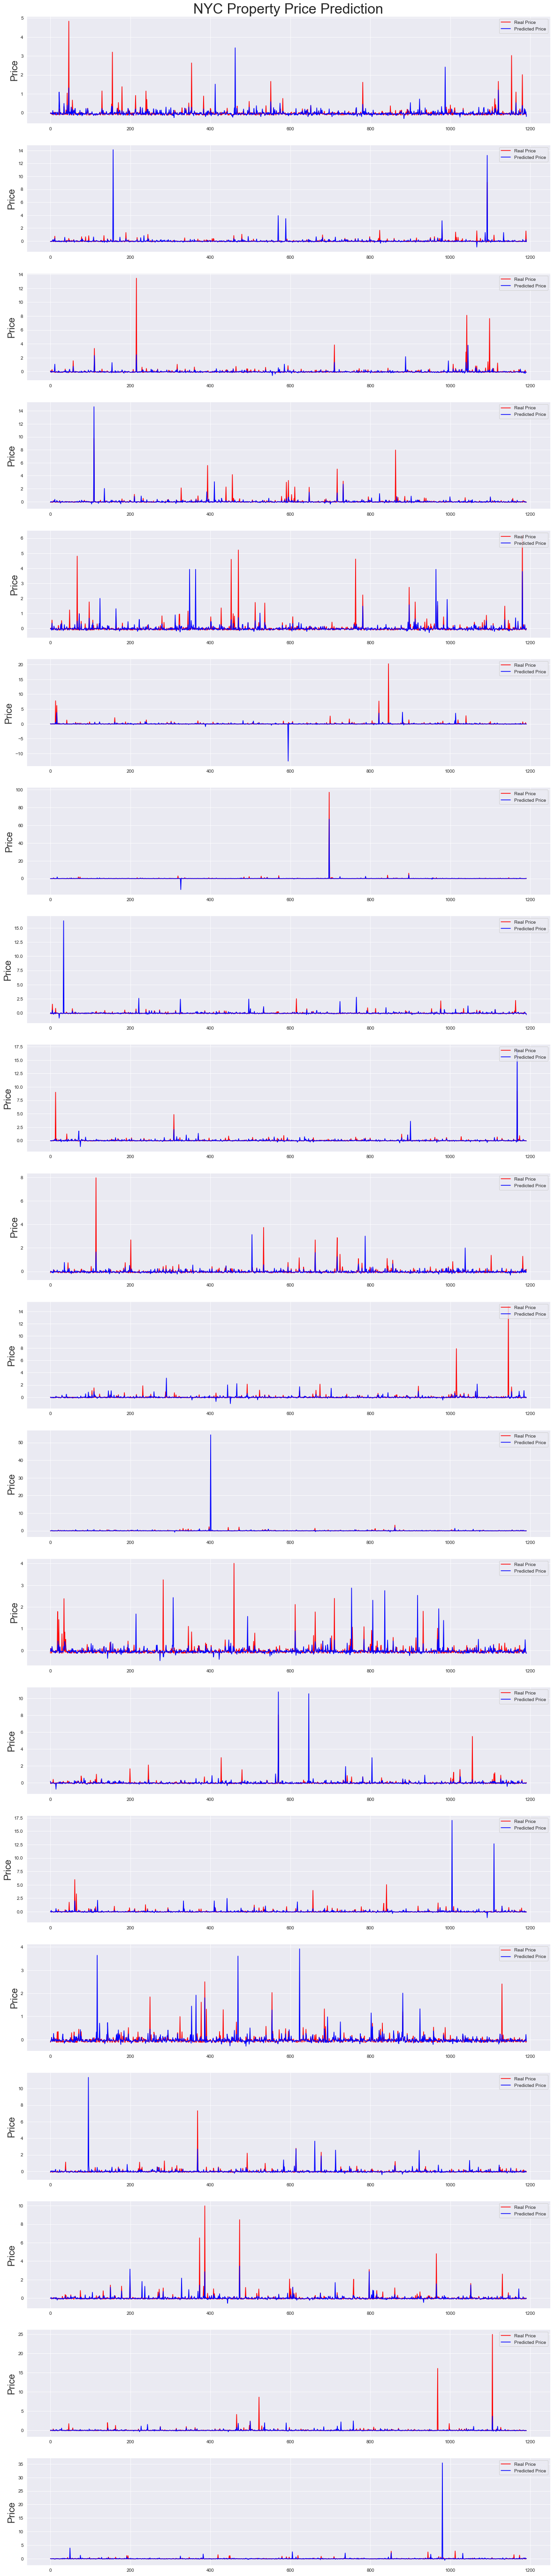

In [29]:
# Visualization the results and evaluation

n = 20
length = len(prediction)
sns.set_style('darkgrid', {'axis.facecolor':'black'})
f, axes = plt.subplots(n, 1, figsize=(20,100))
times = 0
for i in range(n):
    if i == 0:
        plt.sca(axes[0])
        plt.plot(y_test[:round(length/n)], color = 'red', label = 'Real Price')
        plt.plot(prediction[:round(length/n)], color = 'blue', label = 'Predicted Price')
        plt.title('NYC Property Price Prediction', fontsize=30)
        plt.ylabel('Price', fontsize=20)
        plt.legend(loc=1, prop={'size': 10})
    else:
        if i == n-1:
            plt.sca(axes[n-1])
            plt.plot(y_test[round(length/n*(n-1)):], color = 'red', label = 'Real Price')
            plt.plot(prediction[round(length/n*(n-1)):], color = 'blue', label = 'Predicted Price')
            plt.ylabel('Price', fontsize=20)
            plt.legend(loc=1, prop={'size': 10})
        else:
            plt.sca(axes[i])
            plt.plot(y_test[round(length/n*i):round(length/n*(i+1))], color = 'red', label = 'Real Price')
            plt.plot(prediction[round(length/n*i):round(length/n*(i+1))], color = 'blue', label = 'Predicted Price')
            plt.ylabel('Price', fontsize=20)
            plt.legend(loc=1, prop={'size': 10})
plt.show()

In [30]:
prediction

array([-0.01427364, -0.04391074, -0.02468705, ..., -0.03787041,
       -0.03182149,  0.0716126 ], dtype=float32)

In [31]:
predicted_df = pd.DataFrame(list(prediction))
predicted_df

,0
0,-0.014274
1,-0.043911
2,-0.024687
3,-0.018156
4,-0.065867
5,-0.061076
6,0.113611
7,-0.093486
8,0.001116
9,-0.013284


In [32]:
prediction

array([-0.01427364, -0.04391074, -0.02468705, ..., -0.03787041,
       -0.03182149,  0.0716126 ], dtype=float32)

In [41]:
prediction_flattened = prediction
prediction_ravel = np.ravel(prediction_flattened)
prediction_ravel

array([-0.01427364, -0.04391074, -0.02468705, ..., -0.03787041,
       -0.03182149,  0.0716126 ], dtype=float32)

In [44]:
prediction_concat = np.concatenate(prediction)

ValueError: zero-dimensional arrays cannot be concatenated

In [43]:
unscaled = scaler.inverse_transform(prediction_ravel)

ValueError: operands could not be broadcast together with shapes (23826,) (10,) (23826,) 

In [86]:
scale.fit.inverse_transform(prediction)

AttributeError: 'function' object has no attribute 'inverse_transform'

In [84]:
unscaled = scaler.inverse_transform(prediction)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [76]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [82]:
prediction_scaled = scaler.fit_transform(prediction)


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.01588416 -0.05901194 -0.03792477 ... -0.02736139 -0.03884602
  0.09703493].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
scale=preprocessing.MinMaxScaler()
scale.inverse_transform(prediction)


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
predicted_df.get_value['0']

TypeError: 'method' object is not subscriptable

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

y_new_inverse = inverse_transform(prediction)

NameError: name 'inverse_transform' is not defined

In [30]:
prediction_inv = scalerY.inverse_transform(prediction.reshape(-1, 1))

NameError: name 'scalerY' is not defined

In [49]:
unscaled = scaler.inverse_transform(prediction)[:, [1]]

ValueError: operands could not be broadcast together with shapes (23826,) (10,) (23826,) 

In [38]:
unscaled

<bound method StandardScaler.inverse_transform of StandardScaler(copy=True, with_mean=True, with_std=True)>